<a href="https://colab.research.google.com/github/alphavergopi/flask_apps/blob/master/FaceMaskDetector_yolov4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Training and Testing the Face Mask Detector using yolov3 on Google Colab**

**NOTE: some of the commands in the below file has already been run and executed before and hence the results may look different if run for the first time.**

The first task is to get set the GPU for this task. To do this:
Goto Runtime tab -> Select Change Runtime -> Set the Hardware Accelerator to GPU.

The next task is to check if GPU is avaiable to use. Using the command below.

In [1]:
#check to see if GPU is avaiable for this task.
#NVIDIA Tesla T4 GPU is aviable for use.
!nvidia-smi

Sun Aug 23 22:59:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

The next step is to mount the google drive of the google account.

To link drive, just run the cell below.

It will generate a link. Click on the link to login to your google account Get the authorization code and paste it in the box under the cell and press Enter.

If the drive is already mounted, you will get a message that highlights that drive is already mounted.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Change directory to the newly mounted drive
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [14]:
#no need to fork or build darknet again as we already done this for yolov3
#Change directory to darknet
%cd darknet

/content/drive/My Drive/darknet


In [15]:
#no need to download no mask images dataset as alrady done for yolov3
#sometime connection is terminated abruptly. You will have to explictly provide 
#execute permission to the darknet folder.
#NOTE: observed error: ./darknet permission denied, execute below command.
!chmod +x darknet

Before training can be executed, we need to create:

yolov4-no-mask-setup.data file. contains for the file below:

```
#no of classes= 2 (Mask and No_Mask)
classes= 2
#location of the training dataset file
train  = no-mask_data_train.txt
#location of the validation dataset file
valid = no-mask_data_test.txt
#location of the class file
names = no-mask-class.names
#location of the backup file where weights will be created
backup = backup/
```

yolov4-no-mask-train.cfg file is a copy of cfg/yolov4-voc.cfg and following changes are made offline.
```
[net]
learning_rate=0.0001
max_batches = 2000
[yolo]
classes=2
[convolution] just above the yolo
filters=21
```

In [8]:
#execute the training using the below config
!./darknet detector train yolov4-no-mask-setup.data yolov4-no-mask-train.cfg ./yolov4.conv.137 -dont_show -clear -map 2> train_log.txt

Streaming output truncated to the last 5000 lines.
 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 74.17 %, best = 74.17 % 
 1132: 4.219767, 4.391655 avg loss, 0.000100 rate, 4.787916 seconds, 72448 images, 1.739528 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 74.17 %, best = 74.17 % 
 1133: 4.302432, 4.382732 avg loss, 0.000100 rate, 4.669548 seconds, 72512 images, 1.733677 hours left
Loaded: 0.000065 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 74.17 %, best = 74.17 % 
 1134: 2.717544, 4.216214 avg loss, 0.000100 rate, 4.841477 seconds, 72576 images, 1.727587 hours left
Loaded: 0.000059 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 74.17 %, best = 74.17 % 
 1135: 3.877334, 4.182326 avg loss, 0.000100 rate, 4.640277 seconds, 72640 images, 1.721957 hours left
Loaded: 0.000066 seconds

 (next mAP calculation at 1200 iterations) 
 Last accurac

In [3]:
#This function takes imagepath and displays the original image and image based on the 
# darknet prediction as predictions.jpg.
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

#**For Testing the following files are provided:**
yolov4-no-mask-setup.data - setup data for darknet
```
Same as above no changes required
```

yolov4-no-mask-test.cfg - Darknet configuration for testing (copy of the training file with following changes:
```
[net]
batch=1
subdivisions=1
```
yolov4-no-mask-train_best.weights -Best weights from the trained network.

In [16]:
#Execute the test on the test1.jpg
#Treshold is set to 60%
!./darknet detector test yolov4-no-mask-setup.data yolov4-no-mask-test.cfg backup/yolov4-no-mask-train_best.weights test1.jpg -thresh .6


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 rout

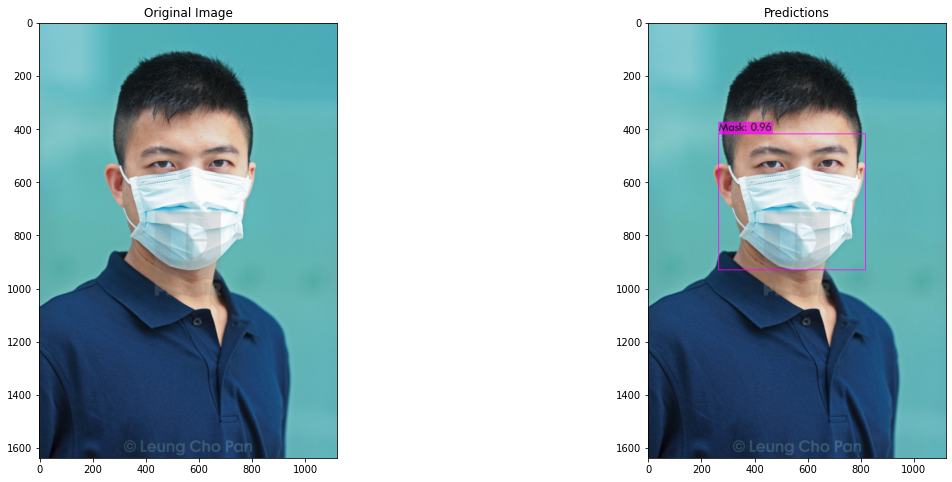

In [17]:
display_output("test1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 128 K-images (2 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test2.jpg: Predicted in 43.338000 milli-seconds.
Mask: 99%
Mask: 91%
No-Mask: 93%
Mask: 80%


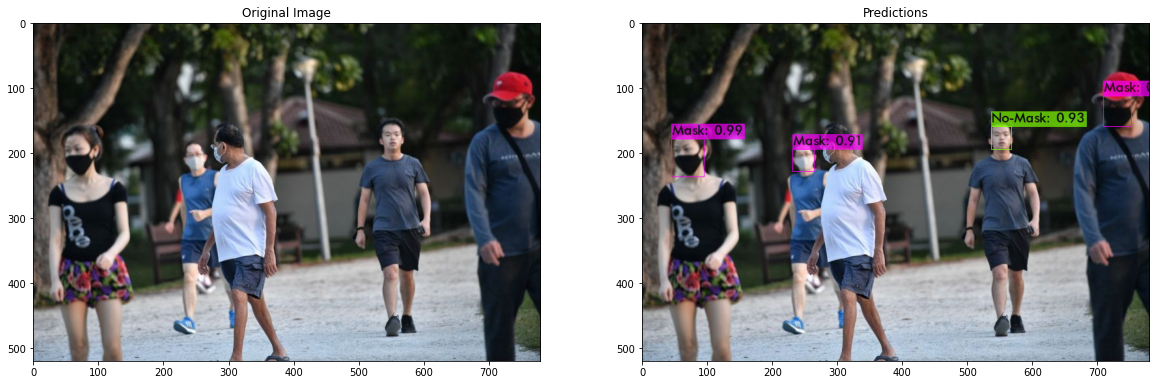

In [18]:
#Execute the test on the test2.jpg
#Treshold is set to 60%
!./darknet detector test yolov4-no-mask-setup.data yolov4-no-mask-test.cfg backup/yolov4-no-mask-train_best.weights test2.jpg -thresh .6 2> /dev/null
display_output("test2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 128 K-images (2 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test3.jpg: Predicted in 43.266000 milli-seconds.
Mask: 98%
Mask: 65%
Mask: 96%
No-Mask: 90%
Mask: 98%
Mask: 93%
Mask: 97%
Mask: 79%
Mask: 98%
Mask: 84%
Mask: 92%
Mask: 91%
Mask: 99%
Mask: 95%
Mask: 98%
Mask: 100%
Mask: 92%
Mask: 93%
Mask: 99%


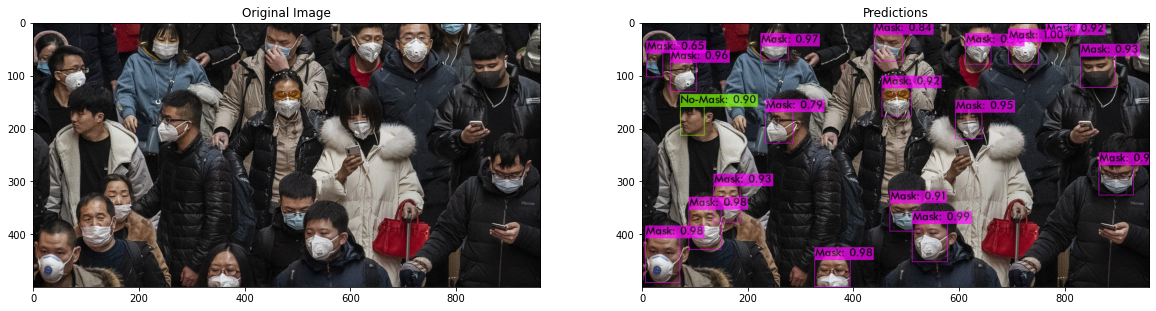

In [19]:
#Execute the test on the test3.jpg
#Treshold is set to 60%
!./darknet detector test yolov4-no-mask-setup.data yolov4-no-mask-test.cfg backup/yolov4-no-mask-train_best.weights test3.jpg -thresh .6 2> /dev/null
display_output("test3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 128 K-images (2 Kilo-batches_64) 
 Detection layer: 139 - type = 28 
 Detection layer: 150 - type = 28 
 Detection layer: 161 - type = 28 
test4.jpg: Predicted in 43.434000 milli-seconds.
No-Mask: 79%
No-Mask: 77%
Mask: 94%
Mask: 99%
No-Mask: 67%
Mask: 98%
No-Mask: 65%
Mask: 99%


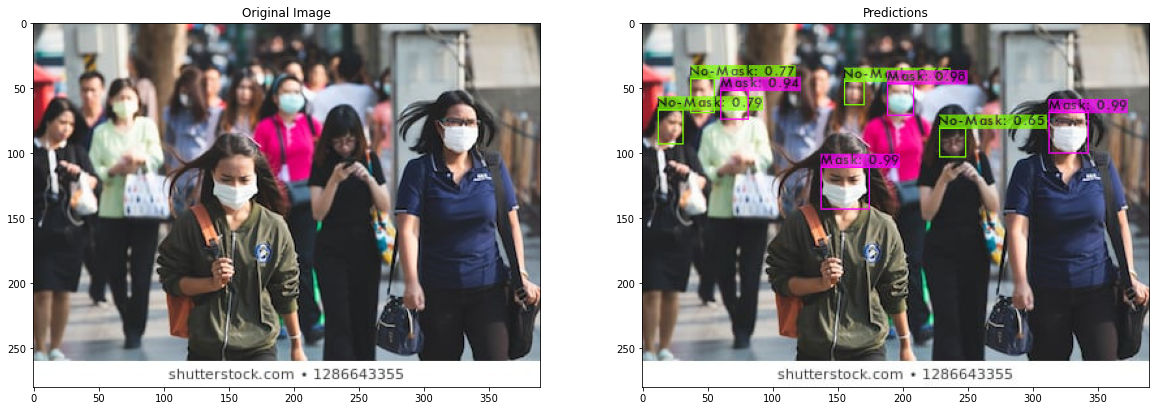

In [20]:
#Execute the test on the test4.jpg
#Treshold is set to 60%
!./darknet detector test yolov4-no-mask-setup.data yolov4-no-mask-test.cfg backup/yolov4-no-mask-train_best.weights test4.jpg -thresh .6 2> /dev/null
display_output("test4.jpg")

In [21]:
#Use the demo config to test the video and save the output as out-vid-yolov4.avi
!./darknet detector demo yolov4-no-mask-setup.data yolov4-no-mask-test.cfg backup/yolov4-no-mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid-yolov4.avi -dont_show

Streaming output truncated to the last 5000 lines.
FPS:36.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 97% 
No-Mask: 95% 
No-Mask: 85% 
Mask: 93% 
Mask: 82% 

FPS:36.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 98% 
No-Mask: 94% 
No-Mask: 85% 
Mask: 91% 
Mask: 91% 

FPS:37.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 91% 
No-Mask: 85% 
Mask: 93% 
Mask: 90% 

FPS:37.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 91% 
No-Mask: 85% 
Mask: 93% 
Mask: 90% 

FPS:38.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 85% 
Mask: 93% 
Mask: 93% 

FPS:38.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 84% 
Mask: 95% 
Mask: 94% 
Mask: 70% 

FPS:38.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 81% 
Mask: 94% 
Mask: 92% 
Mask: 83% 

FPS:39.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 96% 
No-Mask: 79% 
Mask: 95% 
Mask: 95% 
Mask: 94% 

FPS:39.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-Mask: 79